1.What is Logistic Regression, and how does it differ from Linear Regression?

**ans..** Logistic Regression is a classification algorithm used for binary/multiclass classification, while Linear Regression is for regression (continuous output).

2. What is the mathematical equation of Logistic Regression.

ans--P(Y=1)= 1/1+e−(b0+b1X1+...+bnXn)


3.Why do we use the Sigmoid function in Logistic Regression.

ans-It converts any real number into a probability value between 0 and 1.

4.What is the cost function of Logistic Regression.

ans--he log loss function:
𝐽(𝜃)=−1𝑚∑[𝑦log⁡(ℎ)+(1−𝑦)log
(1−ℎ)]J(θ)=−m1∑[ylog(h)+(1−y)log(1−h)]

5. What is Regularization in Logistic Regression? Why is it needed.

ans--Regularization (L1/L2) prevents overfitting by adding a penalty term to the cost function.

6. Explain the difference between Lasso, Ridge, and Elastic Net regressionC

ans-Lasso (L1) shrinks coefficients and sets some to zero.
Ridge (L2) shrinks coefficients but does not set them to zero.
Elastic Net combines both L1 and L2.

7.When should we use Elastic Net instead of Lasso or Ridge.

When features are highly correlated or when Lasso selects too few features.

8. What is the impact of the regularization parameter (λ) in Logistic Regression.

ans--Higher λ increases regularization, reducing overfitting but may cause underfitting.

9. What are the key assumptions of Logistic Regression.
ans--No multicollinearity, independent observations, and a linear relationship between log-odds and predictors.

10.What are some alternatives to Logistic Regression for classification tasks.

ans--Decision Trees, SVM, Random Forest, Neural Networks, Naïve Bayes

11. What are Classification Evaluation Metrics.

ans--Accuracy, Precision, Recall, F1-score, ROC-AUC, Confusion Matrix.

12. How does class imbalance affect Logistic Regression.

ans--It leads to biased predictions; solutions include class weighting, SMOTE, or threshold tuning.



13. What is Hyperparameter Tuning in Logistic Regression.

ans--Adjusting parameters like C (regularization), penalty type, and solver for better performance.



14. What are different solvers in Logistic Regression? Which one should be used.

ans--‘liblinear’ (small datasets), ‘saga’ (large datasets, L1), ‘lbfgs’ (multiclass).

15.How is Logistic Regression extended for multiclass classification.

ans--Using One-vs-Rest (OvR) or Softmax (multinomial) regression.

16. What are the advantages and disadvantages of Logistic Regression.

ans--Pros: Simple, interpretable, efficient.
Cons: Assumes linear decision boundary, sensitive to outliers.

17.What are some use cases of Logistic Regression.

ans=-Spam detection, medical diagnosis, credit scoring, customer churn prediction.

18. What is the difference between Softmax Regression and Logistic Regression.

ans--Softmax is for multiclass problems, Logistic is for binary classification.


19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification.
ans--OvR is simple and works well with few classes; Softmax is preferred for a large number of classes

20.How do we interpret coefficients in Logistic Regression?

ans--Each coefficient represents the change in log-odds for a unit increase in the predictor.

**...practical part...**

In [1]:
#1.Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracyC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [3]:
#2 Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracyC
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


In [4]:
#3.Apply L2 Regularization (Ridge)
model = LogisticRegression(penalty='l2')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))
print("Coefficients:", model.coef_)

Accuracy: 1.0
Coefficients: [[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]


In [5]:
#4.Apply Elastic Net Regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
# 5.Write a Python program to train a Logistic Regression model for multiclass
# classification using multi_class='ovr' C

model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))



Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [7]:
#6.Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
#Regression. Print the best parameters and accuracyC

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
# 7.Write a Python program to evaluate Logistic Regression using Stratified
# K-Fold Cross-Validation. Print the average accuracyC
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=cv)
print("Average Accuracy:", scores.mean())


Average Accuracy: 0.9666666666666666


In [9]:
#Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd

df = pd.read_csv('data.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))



FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [11]:
#9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
#Logistic Regression. Print the best parameters and accuracyM

from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
random_search = RandomizedSearchCV(LogisticRegression(), param_dist, cv=5, n_iter=5)
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)


Best Params: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


In [10]:
# 10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic
# Regression and print accuracyM

from sklearn.multiclass import OneVsOneClassifier

model = OneVsOneClassifier(LogisticRegression())
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


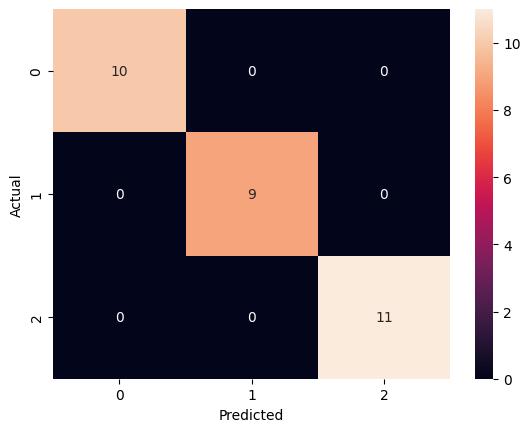

In [12]:
#11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
#classification

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [13]:
# 12.Write a Python program to train a Logistic Regression model and evaluate
# its performance using Precision, Recall, and F1-ScoreM

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [14]:
#13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performanceM

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performanceM
df = pd.read_csv('titanic.csv')
df.fillna(df.mean(), inplace=True)

X = df[['Pclass', 'Age', 'Fare']]  # Example features
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression()
model.fit(X_train, y_train)

print("Accuracy:", model.score(X_test, y_test))


In [15]:
#15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
#model. Evaluate its accuracy and compare results with and without scalingM

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print("Accuracy:", model.score(X_test_scaled, y_test))


Accuracy: 1.0


In [16]:
#16..Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC scoreM
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


ValueError: multi_class must be in ('ovo', 'ovr')

In [17]:
#17..Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracyM

model = LogisticRegression(C=0.5)
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 1.0


In [18]:
#18.. Write a Python program to train Logistic Regression and identify important features based on model coefficientsM

import numpy as np

feature_importance = np.abs(model.coef_).flatten()
print("Feature Importance:", feature_importance)


Feature Importance: [0.3792282  0.71689385 1.93173127 0.79860527 0.36046456 0.31444087
 0.11412204 0.54499411 0.01876365 0.40245298 2.0458533  1.34359938]


In [19]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score

from sklearn.metrics import cohen_kappa_score

print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))


Cohen’s Kappa Score: 1.0


In [21]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classificatio:

from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


# Binarize the output for multi-class
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# Assuming y_prob has probabilities for all classes, choose one for the curve
y_prob_bin = y_prob[:, 1] # Example: probability for class 1


precision, recall, _ = precision_recall_curve(y_test_bin[:,1], y_prob_bin) # probability for class 1
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [22]:
#21..Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracyM

solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    print(f"Solver {solver}: Accuracy = {model.score(X_test, y_test)}")


Solver liblinear: Accuracy = 1.0
Solver saga: Accuracy = 1.0
Solver lbfgs: Accuracy = 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#22.. Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC)M
from sklearn.metrics import matthews_corrcoef

print("MCC Score:", matthews_corrcoef(y_test, y_pred))


In [23]:
#23..Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scalingM

model.fit(X_train, y_train)
raw_acc = model.score(X_test, y_test)

model.fit(X_train_scaled, y_train)
scaled_acc = model.score(X_test_scaled, y_test)

print("Raw Accuracy:", raw_acc)
print("Scaled Accuracy:", scaled_acc)


Raw Accuracy: 1.0
Scaled Accuracy: 1.0


In [24]:
#24.. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validationM

from sklearn.model_selection import cross_val_score

for C in [0.01, 0.1, 1, 10]:
    model = LogisticRegression(C=C)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"C={C}: Accuracy = {scores.mean()}")


C=0.01: Accuracy = 0.8583333333333334
C=0.1: Accuracy = 0.9333333333333333
C=1: Accuracy = 0.9666666666666666
C=10: Accuracy = 0.9416666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [25]:
#25.. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib

joblib.dump(model, 'logistic_model.pkl')
loaded_model = joblib.load('logistic_model.pkl')

print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.